# Is Tertiary education a good predictor of happiness, GDP and state capacity?

You can find the Github with this notebook and all applicable datasets here: https://github.com/danielkoni/ec-01-On-Tertiary-Education

This project will use data from https://ourworldindata.org.

The project takes a look at how the percent of tertiary education among the adult population of nations influences or predicts other social aspects of those nations. Here is an overview of the data used:

-Percent of Tertiary education attained includes all education past secondary level including professional courses, bachelor degrees and tech/diploma based education of ages 25 to 65.

-We are interested in investigating its relation with happiness a metric measured through the cantril ladder method giving us an average ranging from 0 to 10 for each country that participated.

-Then tertiary education's relation with state capacity - the level at which a state has control over its own country including resources, intervention, taxation, provision of services etc.

-As well as how tertiary education may be connected to government spending on education as a proportion of the country's GDP.

-And lastly its relation to some measure of income. First we looked at Daily Median Income, but later changed that to GDP per Capita due to a limited amount of data points in the first dataset.



This research aims to research a facet of the complex problem of inequality, specifically if the inequality of highly educated citizens has a strong impact on other aspects of national metrics. Each of our chosen metrics demonstrate different forms of global inequality.

Now let us dig into the data together.

Data Sources:

Public spending on education: https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp?time=2022

Share of Population with Tertiary education ages 25 to 65: https://ourworldindata.org/grapher/share-of-the-population-with-completed-tertiary-education

Cantril Ladder on self-reported happiness: https://ourworldindata.org/happiness-and-life-satisfaction

State Capacity: https://ourworldindata.org/grapher/state-capacity-index

GDP per Capita (added later): https://ourworldindata.org/grapher/gdp-per-capita-worldbank

Daily Median Income: https://ourworldindata.org/grapher/daily-median-income?time=2015

In [31]:
#In the following code we will be importing all of the necessary libraries,
#we will clean, explore, describe and vizualize the data, as well as import the data
#downloaded from the links above:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Education = pd.read_csv('share-of-the-population-with-completed-tertiary-education.csv')
Happiness = pd.read_csv('happiness-cantril-ladder.csv')
Daily_Income = pd.read_csv('daily-median-income.csv')
State_Capacity = pd.read_csv('state-capacity-index.csv')
Spending = pd.read_csv('total-government-expenditure-on-education-gdp.csv')
GDP = pd.read_csv('gdp-per-capita-worldbank.csv')

Before we start let's set our hypotheses. Because of how valued education is in our world, we can set a standard hypothesis saying that tertiary education has a positive relation with all of our metrics. The null hypothesis for each of the metrics will then be that there is no noticeable predictability between tertiary education and the metrics that interest us. We'll have four metrics, thus we have four hypotheses to test.

Now that we have our data we can see if it downloaded properly by calling each dataset variable, feel free to remove the hashtag from the dataframes that you, dear reader, may want to call if you want to look at the unprocessed data in any part of our code below, there will be hashtags on certain parts to keep the viewing experience accessible feel free to play around with the code:

In [32]:
#Education.head()
#Happiness.head()
#Daily_Income.head()
State_Capacity.iloc[50:59]
#Spending.head()
#GDP.head()

,Entity,Code,Year,State capacity estimate
50,Afghanistan,AFG,2010,-1.268000
51,Afghanistan,AFG,2011,-1.225000
52,Afghanistan,AFG,2012,-1.183000
53,Afghanistan,AFG,2013,-1.110000
54,Afghanistan,AFG,2014,-1.019000
55,Afghanistan,AFG,2015,-1.046000
56,Africa,NaN,1960,-0.836023
57,Africa,NaN,1961,-0.763666
58,Africa,NaN,1962,-0.746359


Looking at the state capacity dataset we can notice that the data ends at the year 2015. Which makes it the year with the earliest data that matches all the datasets that we are interested in. As such we will concentrate our research on the year 2015 to see if tertiary education can predict happiness, GDP per Capita, Daily Income, Spending on Education and State Capacity in that year.

Which means we now have to trim our datasets to only contain data from 2015. We want our data to be as precise as possible while deleting the least amount of information possible, ideallly removing or replacing any dataset that doesn't have enough data for the year 2015, let's take a look.

In [33]:
#But first, we can rename all of our metrics of interest's columns to make them more manageable us:
Education.rename(columns={Education.columns[3]: 'Percent of Tertiary Education'}, inplace=True)
Spending.rename(columns={Spending.columns[3]: 'Spending on Education'}, inplace=True)
GDP.rename(columns={GDP.columns[3]: 'GDP per Capita'}, inplace=True)

In [34]:
#Now we save only the year 2015 for all of our data:
Edu_2015 = Education[Education['Year'] == 2015]
#Edu_2015

In [35]:
SC_2015 = State_Capacity[State_Capacity['Year'] == 2015]
#SC_2015

In [36]:
Hap_2015 = Happiness[Happiness['Year'] == 2015]
#Hap_2015

In [37]:
GDP_2015 = GDP[GDP['Year'] == 2015]
#GDP_2015

In [38]:
SpendE_2015 = Spending[Spending['Year'] == 2015]
#SpendE_2015

In [39]:
Daily_2015 = Daily_Income[Daily_Income['Year'] == 2015]
Daily_2015

,Entity,Code,Year,Median income or consumption,990177-annotations
6,Albania,ALB,2015,10.043126,NaN
67,Armenia,ARM,2015,7.108039,NaN
106,Austria,AUT,2015,54.984207,NaN
146,Belarus,BLR,2015,15.229697,NaN
170,Belgium,BEL,2015,50.488320,NaN
...,...,...,...,...,...
2478,United States,USA,2015,54.421295,NaN
2495,Uruguay,URY,2015,22.413225,NaN
2574,Western and Central Africa (PIP),NaN,2015,2.900000,NaN
2609,World,OWID_WRL,2015,6.600000,NaN


In [40]:
#We'll create a list that contains our datasets to make it easier to work with them
datasets = [Edu_2015, Hap_2015, SC_2015, SpendE_2015, GDP_2015]

In [41]:
#We will use the unique function to make sure there are no repeat values/nations
Edu_Entities = Edu_2015['Entity'].unique()

#This loop, one by one takes each dataset and removes all entities that do not match
#the Education Entity column.
for i, dataset in enumerate(datasets):
    datasets[i] = dataset[dataset['Entity'].isin(Edu_Entities)]

In [42]:
#We can now do the same thing but for each of the other datasets.

for i, dataset in enumerate(datasets):
    datasets[i] = dataset[dataset['Entity'].isin(datasets[1]['Entity'].unique())]
for i, dataset in enumerate(datasets):
    datasets[i] = dataset[dataset['Entity'].isin(datasets[2]['Entity'].unique())]
for i, dataset in enumerate(datasets):
    datasets[i] = dataset[dataset['Entity'].isin(datasets[3]['Entity'].unique())]
for i, dataset in enumerate(datasets):
    datasets[i] = dataset[dataset['Entity'].isin(datasets[4]['Entity'].unique())]

#Here we can look at our results, feel free to play around  with it. All rows now equal
#to 112 in all datasets.

datasets[0]
#datasets[1]
#datasets[2]
#datasets[3]
#datasets[4]

,Entity,Code,Year,Percent of Tertiary Education
29,Afghanistan,AFG,2015,8.8
99,Albania,ALB,2015,2.3
134,Algeria,DZA,2015,14.1
169,Argentina,ARG,2015,12.9
175,Armenia,ARM,2015,27.2
...,...,...,...,...
4083,United Kingdom,GBR,2015,30.7
4118,United States,USA,2015,60.3
4153,Uruguay,URY,2015,9.1
4194,Vietnam,VNM,2015,6.8


In [43]:
#First we're going to create a new variable that will hold our initial dataframe for
#education into which we will then iteratively merge the rest of the datasets [1:]
#using the pd.merge function on 'Entity', 'Code', and 'Year'.
Full_df = datasets[0]

for df in datasets[1:]:
    Full_df = pd.merge(Full_df, df, on=['Entity', 'Code', 'Year'])

In [44]:
Full_df

,Entity,Code,Year,Percent of Tertiary Education,Cantril ladder score,State capacity estimate,Spending on Education,GDP per Capita
0,Afghanistan,AFG,2015,8.8,3.360,-1.0460,3.255800,2108.7140
1,Albania,ALB,2015,2.3,4.655,0.5549,3.437970,11878.4950
2,Algeria,DZA,2015,14.1,6.355,0.1428,7.962967,11751.6340
3,Argentina,ARG,2015,12.9,6.650,0.8095,5.776110,23933.8870
4,Armenia,ARM,2015,27.2,4.360,1.0710,2.805910,11506.0390
...,...,...,...,...,...,...,...,...
107,United Kingdom,GBR,2015,30.7,6.725,1.7770,5.553590,44648.8440
108,United States,USA,2015,60.3,7.104,1.8600,4.946780,58420.7030
109,Uruguay,URY,2015,9.1,6.545,1.2930,4.206370,22731.5210
110,Vietnam,VNM,2015,6.8,5.061,0.7557,3.416604,8091.0894


Now we have a beautiful table that includes all of our metrics matched to their nations. Let's check that there aren't any Nan values before we start displaying our data.

In [45]:
Do_We_Have_Any_NA_Values = Full_df.isna().any().any()
Do_We_Have_Any_NA_Values

False

No Nan's, great! Thank you "Our World In Data" for making such clean datasets.
We can now display each of our metrics of interest

## Visualizations and Descriptions

In [46]:
#We can see a description of our metrics by using .describe()
Full_df.describe()

,Year,Percent of Tertiary Education,Cantril ladder score,State capacity estimate,Spending on Education,GDP per Capita
count,112.0,112.000000,112.000000,112.000000,112.000000,112.000000
mean,2015.0,17.516964,5.436098,0.804796,4.465966,20244.012283
std,0.0,14.261577,1.160916,0.846456,1.518389,18030.908449
min,2015.0,0.000000,2.905000,-1.152000,1.703461,781.579300
25%,2015.0,5.300000,4.412250,0.247225,3.323897,5173.114375
50%,2015.0,14.450000,5.438500,0.657200,4.354678,13784.705500
75%,2015.0,26.425000,6.356500,1.477500,5.374923,30532.330500
max,2015.0,67.900000,7.526000,2.697000,9.530636,89248.125000


Our data shows that there is a measurable global inequality in tertiary education attainment. When the mean is 17.5% of adults having completed post-secondary education while the 75% percentile only goes as far as 26.4% while the maximum is 67.9%.

The state capacity estimate has similar disparities with a mean of 0.8 but ranging widely from low negative values to a high of 2.7. Also GDP per capita, averages around $20,244 with a large proportion of countries below this average and once again a select few go up to $89,248. Now if we look at the top countries in every one of our metrics we can easily see if the richest countries also have high Tertiary education and other metrics then the divide can simply be one of wealth. Let's see our top contenders:

In [47]:
#We can use the sort_values function to find the top ten countries in each category
Ten_Tertiary = Full_df.sort_values(by='Percent of Tertiary Education', ascending=False).head(10)
#and now we copy and replace the names of the columns and variable for each metric:
Ten_Happiness = Full_df.sort_values(by='Cantril ladder score', ascending=False).head(10)
Ten_Statecapacity = Full_df.sort_values(by='State capacity estimate', ascending=False).head(10)
Ten_Spending = Full_df.sort_values(by='Spending on Education', ascending=False).head(10)
Ten_GDP = Full_df.sort_values(by='GDP per Capita', ascending=False).head(10)

In [60]:
#To make it easier to view we can create a new dataframe with only the top ten values from each category:
Top_Ten = pd.DataFrame({'Tertiary': Ten_Tertiary['Entity'].values,
'Happiness': Ten_Happiness['Entity'].values,'StateCapacity': Ten_Statecapacity['Entity'].values,
'Spending_Edu': Ten_Spending['Entity'].values, 'GDP': Ten_GDP['Entity'].values})

Top_Ten

,Tertiary,Happiness,StateCapacity,Spending_Edu,GDP
0,Russia,Denmark,Denmark,Namibia,Singapore
1,United States,Switzerland,Norway,Botswana,Switzerland
2,South Korea,Norway,Austria,Bolivia,Norway
3,Canada,Finland,Belgium,Algeria,United States
4,Singapore,Canada,Sweden,Norway,Netherlands
5,Ukraine,Netherlands,Finland,Sweden,Denmark
6,Japan,New Zealand,Germany,Finland,Austria
7,Israel,Australia,Switzerland,Denmark,Germany
8,New Zealand,Sweden,New Zealand,Costa Rica,Sweden
9,Cyprus,Israel,Australia,Belgium,Belgium


Interestingly enough not a single country appears in more than three categories at once, which at the very least means that there is some variance in terms of developmental metrics. Now that we have a rough understanding of our data, we can now visualize the metrics first as distributions and then as scatterplots.

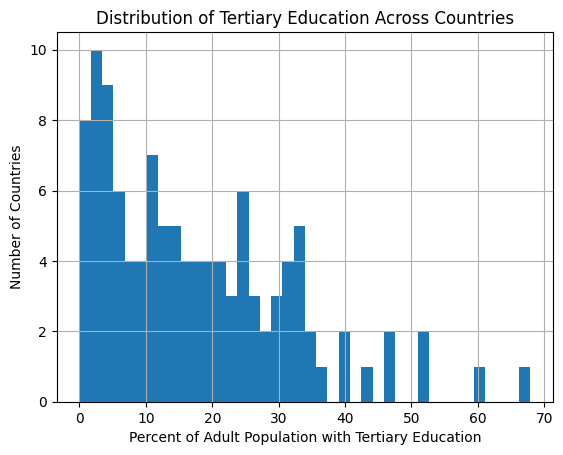

In [49]:
#Using this code we can display the distribution of countries with similar percentage
#of citizens against their percent of tertiary education
Full_df['Percent of Tertiary Education'].hist(bins=40)
plt.title('Distribution of Tertiary Education Across Countries')
plt.xlabel('Percent of Adult Population with Tertiary Education')
plt.ylabel('Number of Countries')
plt.show()

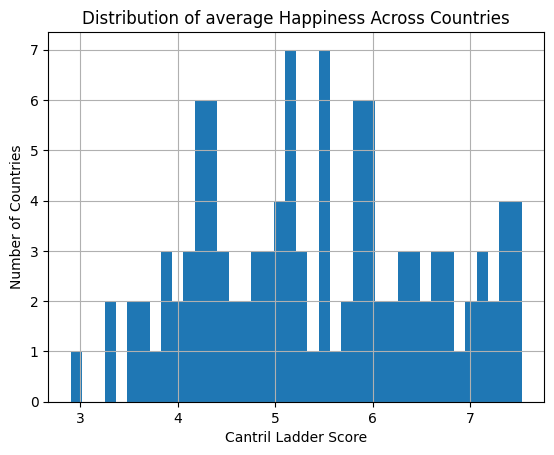

In [50]:
#We're going to repeat the process for every one of our main metrics:
Full_df['Cantril ladder score'].hist(bins=40)
plt.title('Distribution of average Happiness Across Countries')
plt.xlabel('Cantril Ladder Score')
plt.ylabel('Number of Countries')
plt.show()

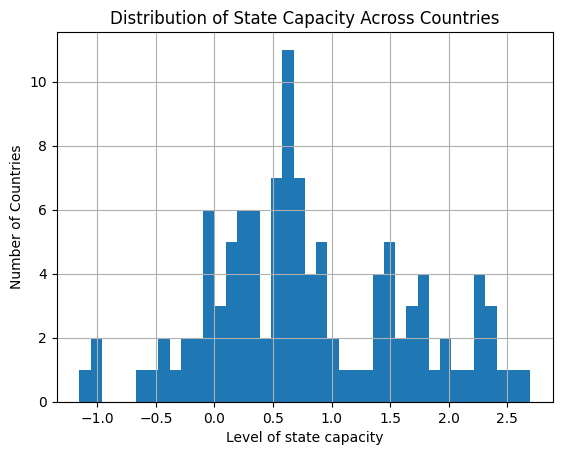

In [51]:
Full_df['State capacity estimate'].hist(bins=40)
plt.title('Distribution of State Capacity Across Countries')
plt.xlabel('Level of state capacity')
plt.ylabel('Number of Countries')
plt.show()

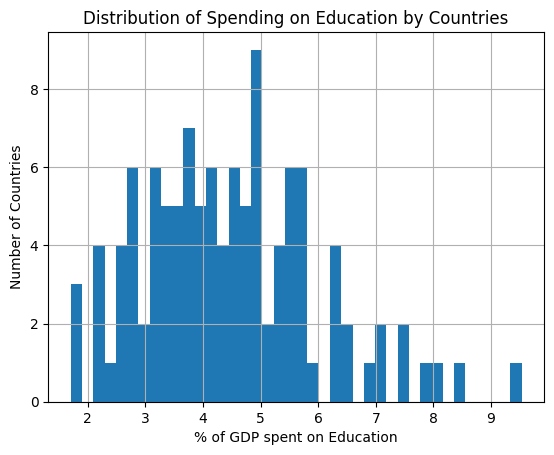

In [52]:
Full_df['Spending on Education'].hist(bins=40)
plt.title('Distribution of Spending on Education by Countries')
plt.xlabel('% of GDP spent on Education')
plt.ylabel('Number of Countries')
plt.show()

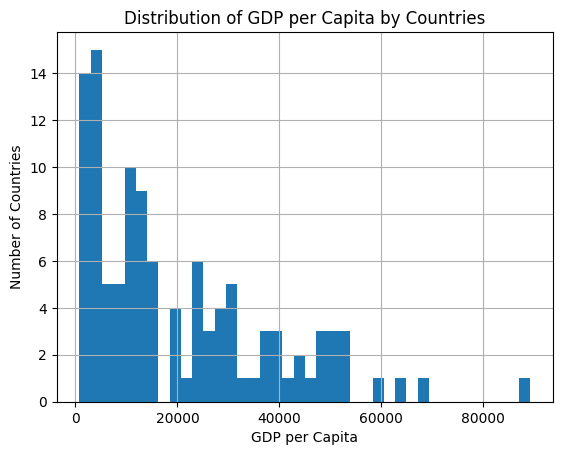

In [53]:
Full_df['GDP per Capita'].hist(bins=40)
plt.title('Distribution of GDP per Capita by Countries')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Countries')
plt.show()

These histograms give an interesting view, we have 3 categories of similar sets. Tertiary Education and the GDP per Capita stats give a similar looking graph which both sharply decrease the further you move away from zero. State capacity and Expenditure on Education are slightly similar, we can make a slight assumption that one of the metrics by which state capacity is calculated is spending on education. Lastly, happiness distribution is somewhat different looking from the rest.

Now to understand how the metrics compare and relate to each other we can plot them as scatter plots using the pairplot function from seaborn:

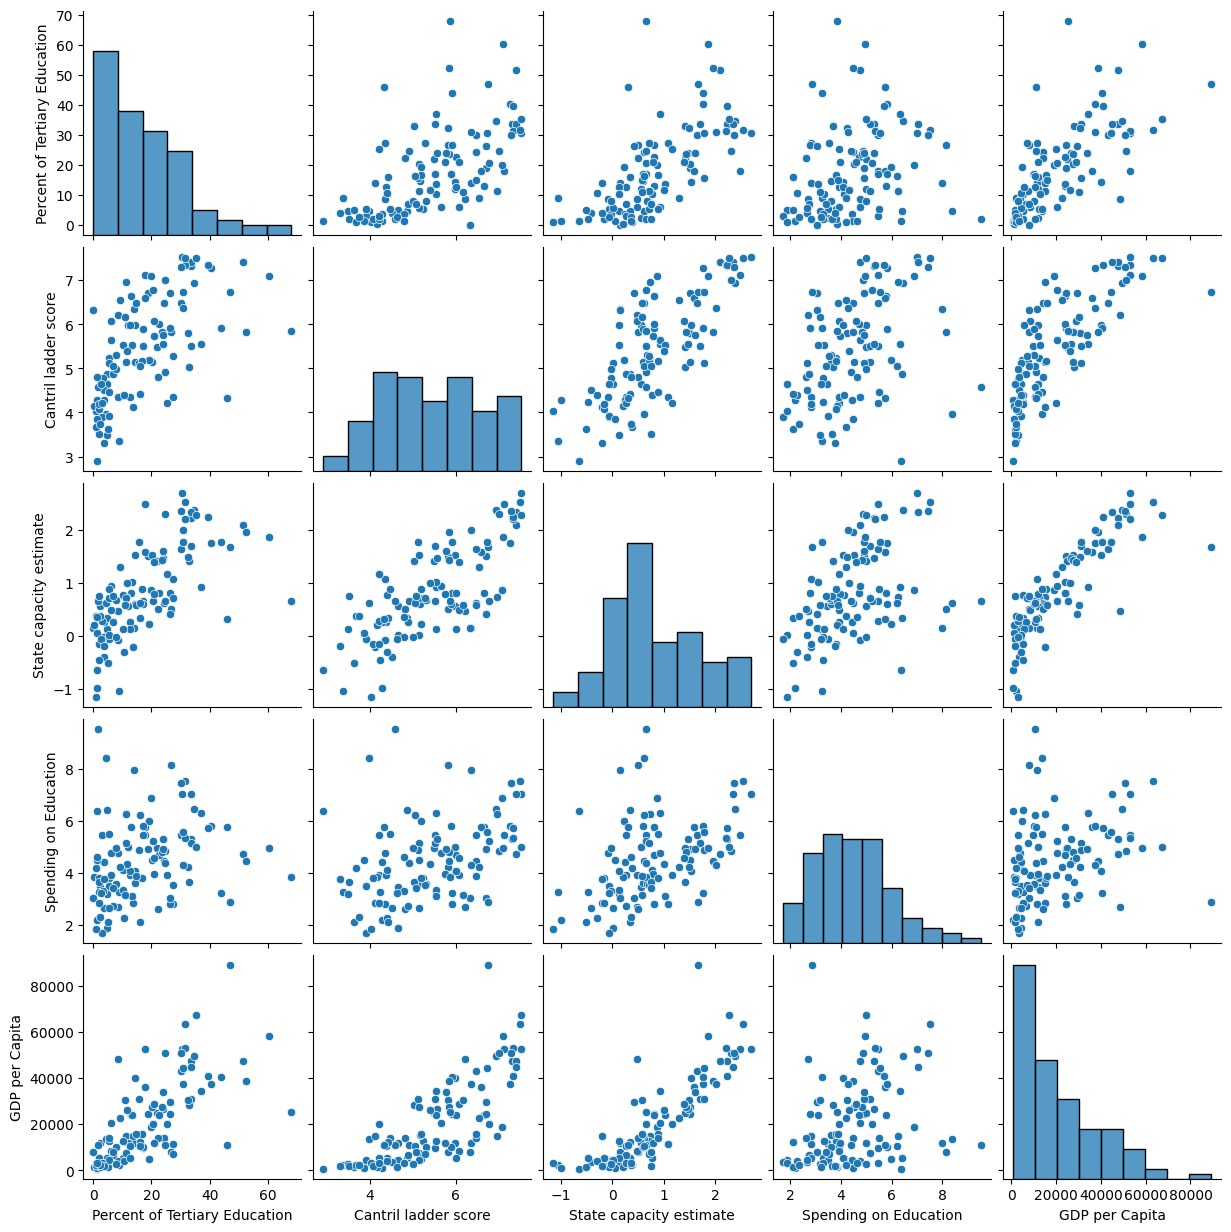

In [54]:
sns.pairplot(Full_df.iloc[:,3:8])
plt.show();

If you look closely some of the scatter plots in the first row scatter in more of a diagonal fashion than others. It looks like Tertiary Education and State Capacity may have a positive correlation. Let's take a closer look at these two metrics and add a regression line between the points to better understand their relationship:

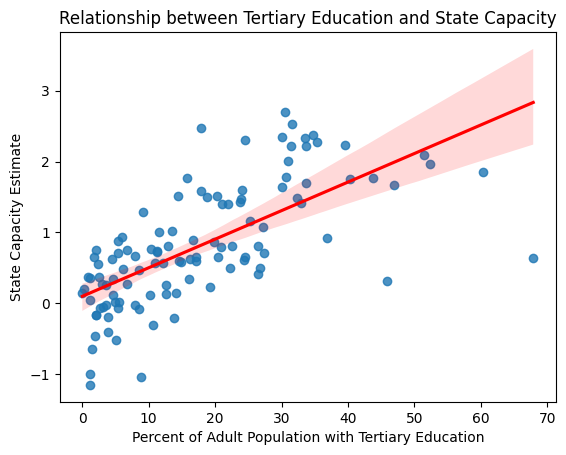

In [55]:
#seaborn has this nice plot function that also draws a good fit line:
sns.regplot(data=Full_df, x='Percent of Tertiary Education', y='State capacity estimate',
line_kws={'color': 'red'})
plt.title('Relationship between Tertiary Education and State Capacity')
plt.xlabel('Percent of Adult Population with Tertiary Education')
plt.ylabel('State Capacity Estimate')
plt.show()

This scatterplot does seem to point to a positive relationship between Tertiary Education and State Capacity, potentially this could suggest that higher educated citizen makeup a more effective government system. Nonetheless is would be good to first do a t-test before jumping to any conclusions. Let's look at the rest of the scatter plots:

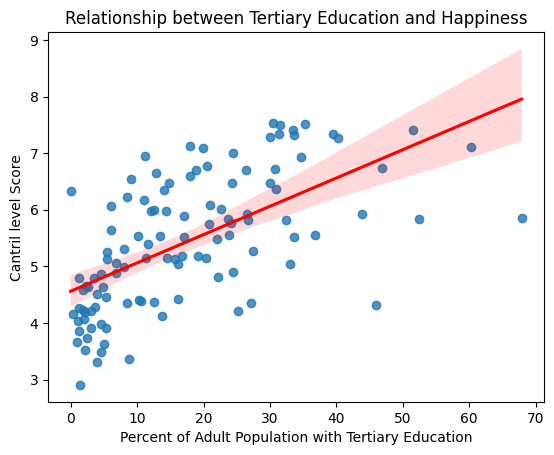

In [56]:
#we'll use the same function to compare tertiary education to happiness:
sns.regplot(data=Full_df, x='Percent of Tertiary Education', y='Cantril ladder score',
line_kws={'color': 'red'})
plt.title('Relationship between Tertiary Education and Happiness')
plt.xlabel('Percent of Adult Population with Tertiary Education')
plt.ylabel('Cantril level Score')
plt.show()

The relationship between tertiary education and happiness is very similar to our previous graph. Again it is hard to make an effective conclusion but definitely worth investigating further.

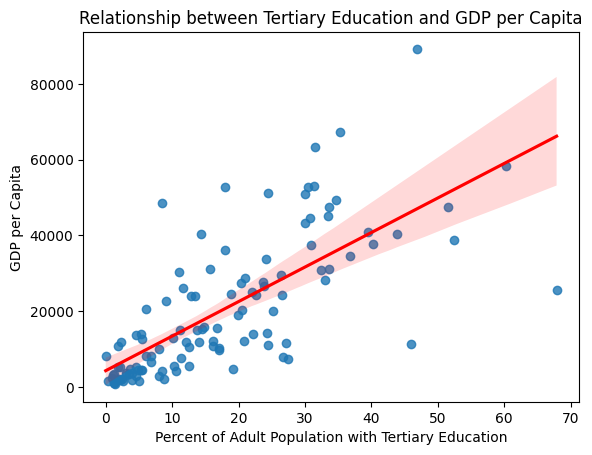

In [57]:
#and again we'll use the same function to compare tertiary education percentages
#to GDP per Capita:
sns.regplot(data=Full_df, x='Percent of Tertiary Education', y='GDP per Capita',
line_kws={'color': 'red'})
plt.title('Relationship between Tertiary Education and GDP per Capita')
plt.xlabel('Percent of Adult Population with Tertiary Education')
plt.ylabel('GDP per Capita')
plt.show()

Surprisingly the line for the relationship between Tertiary education and GDP per Capita is steeper than the previous two graphs. There is higher evidence for rejectin the null hypothesis based on an initial visualization. This should make sense as a higher quality workforce should in theory produce higher valued products and service. We will look further into this in the second part of this research project.

Now let's look at Spending on Education:

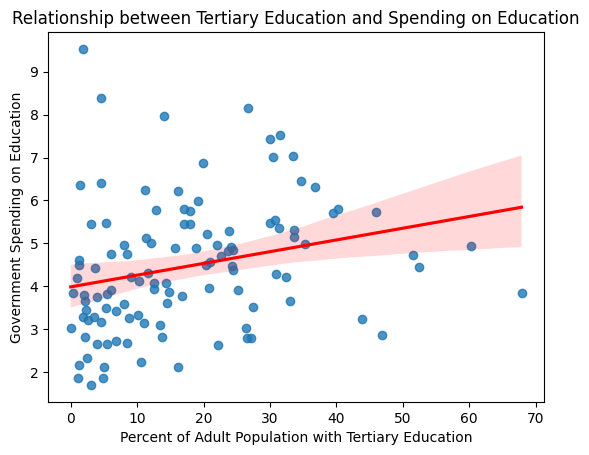

In [58]:
#one final time we'll use the regplot function to compare tertiary education percentages
#to Spending on Education:
sns.regplot(data=Full_df, x='Percent of Tertiary Education', y='Spending on Education',
line_kws={'color': 'red'})
plt.title('Relationship between Tertiary Education and Spending on Education')
plt.xlabel('Percent of Adult Population with Tertiary Education')
plt.ylabel('Government Spending on Education')
plt.show()

In this last graph the line is flatter than in the previous graphs and the the distribution of dots is more random. This finding is very interesting, it suggests that the null hypothesis might hold, meaning that there isn't a strong relationship between spedning on education and the percentage of people with tertiary education. There can be many different potential explanation for this phenomenon, such as the prevalence of private education in tertiary levels, thus not requiring government spending. Or high spending done in the past to build educational buildings and laboratories, which once built require far less spending. Since we are only looking at a single year we should not forget about the change of spending from past years.

This is quite interesting as a deeper understanding of this relationship might free up some of the funding going towards education towards things like social security, healthcare and other government support functions without massively affecting higher levels of education. We can't say for sure yet, but we definitely suggest researching this further.


## Limitations

Our data did not hold all the countries of the world. Countries with less stable or more secluded governments don't always have the ability or desire to submit data. This means that our research ultimately is not free of the bias of looking at countries that are more stable and open.

We only used data from 2015, if we removed or replaced state capacity we could have taken a look at newer data in the other metrics or looked at the change in metrics over time. These are some things that a future project on the topic could expand upon.

Metrics such as the state capacity metric and GDP per Capita most likely have some form of connection or interdependece between them. Keeping this in mind is important to not take some of the relational outcomes too seriously. Other metrics such as Daily_Median_Income could've given us a better estimate of income, unfortunately that data had far less data points.

Finally, all of the data used came from the same dataset provider ourworldindata.org, it could be interesting to compare similar types of data from other sources to limit potential biases.


## Conclusion

This preliminary visualization of our data gives us a good first view.
In terms of our hypotheses Tertiary Education:
1) has a seemingly positive relation with State Capacity
2) has a seemingly positive relation with happiness
3) has a visibly strong relation with GDP per Capita
4) has a seemingly low positive relation with spending on education

Global inequality might have a connection to higher levels of education and the distribution of educated people, but rejecting or accepting any of the null hypotheses would first require a linear regression or t-test with an analysis of their p-values and r-values. Which will be done in the next submission of this research project.

## References:

Our World in Data, 2024. Share of Population with Tertiary Education (Ages 25–65). Available at: https://ourworldindata.org/grapher/share-of-the-population-with-completed-tertiary-education [Accessed on the 24th of October 2024].

Our World in Data, 2024. Cantril Ladder on Self-Reported Happiness. Available at: https://ourworldindata.org/happiness-and-life-satisfaction [Accessed on the 24th of October 2024].

Our World in Data, 2024. State Capacity Index. Available at: https://ourworldindata.org/grapher/state-capacity-index [Accessed on the 24th of October 2024].

Our World in Data, 2023. GDP per Capita (World Bank). Available at: https://ourworldindata.org/grapher/gdp-per-capita-worldbank [Accessed on the 24th of October 2024].

Our World in Data, 2024. Daily Median Income. Available at: https://ourworldindata.org/grapher/daily-median-income [Accessed on the 24th of October 2024].

Our World in Data, 2024. Total Government Expenditure on Education as % of GDP. Available at: https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp [Accessed on the 25th of October 2024]